# Espectroscopia

### _Este notebook foi criado para estudo de uma disciplina de Física Experimental Avançada._

O objetivo deste experimento foi analisar o expectro de emissão de diferentes fontes luminosas. Para tal, um espectrometro foi utilizado, a fim de obter os dados de emissão das fontes. E, a partir destes dados, estudar e comparar a origem do espectro obtido para cada lâmpada utilizada.

Este notebook foi montado para o tratamento dos dados obtidos no experimento, e nele será mostrado o passo a passo, desde a análise dos dados originais, até o tratamento e posterior apresentação dos dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [28]:
def normalize(column):
    '''
    Essa função tem objetivo de receber um pandas.Series como entrada e retornar os valore normalizados.
    '''
    return (column - column.min())/(column.max() - column.min())

def example_plot(ax, dados, file_name, cor):
    '''
    Esta função padroniza a forma com que os dados serão plotados
    '''
    ax.plot(dados['Comprimento'], normalize(dados['Intensity']), color = cor)
    ax.set_xlabel('Comprimento de Onda (nm)', fontsize=12)
    ax.set_ylabel('Intensidade', fontsize=12)
    ax.set_title(file_name, fontsize=14)

In [3]:
# Dados puros
# Exemplo do Argônio

recording = False # Queremos ignorar os metadados gerados pelo programa de captura

with open('./old/argon.txt') as src_file:
    for line in src_file:
        if "Begin Processed Spectral Data" in line or "End Processed Spectral Data" in line:
            recording = not recording
            continue
        if recording:
            print(line)

178,13	1267,69

178,35	1267,69

178,57	1267,69

178,78	1333,23

179,00	1251,31

179,22	1533,93

179,44	1550,31

179,66	1474,54

179,87	1482,73

180,09	1394,67

180,31	1482,73

180,53	1409,00

180,75	1384,43

180,96	1382,38

181,18	1447,91

181,40	1370,09

181,62	1439,72

181,84	1433,58

182,05	1513,45

182,27	1423,34

182,49	1468,39

182,71	1443,82

182,92	1529,83

183,14	1505,26

183,36	1474,54

183,58	1447,91

183,80	1611,75

184,01	1464,30

184,23	1521,64

184,45	1554,41

184,67	1505,26

184,89	1538,02

185,10	1523,69

185,32	1439,72

185,54	1482,73

185,76	1486,83

185,97	1464,30

186,19	1488,87

186,41	1458,15

186,63	1415,15

186,84	1456,11

187,06	1484,78

187,28	1531,88

187,50	1384,43

187,72	1523,69

187,93	1515,50

188,15	1521,64

188,37	1499,11

188,59	1464,30

188,80	1513,45

189,02	1441,77

189,24	1497,07

189,46	1480,68

189,67	1550,31

189,89	1488,87

190,11	1480,68

190,33	1570,79

190,54	1472,49

190,76	1513,45

190,98	1484,78

191,20	1439,72

191,41	1499,11

191,63	1

Para utilizarmos o Pandas, lendo os arquivos pela função `pd.read_csv()`, precisamos:

1. Limpar os metadados do arquivo;
2. Alterar o separador de casas decimais, de `,` para `.`(é possível fazer isto pela própria função utilizando o argumento `decimal=','`, mas será feito pelo script. para manter uma padronização).

In [21]:
recording = False

for file in os.listdir('./old/'):
    print(file)
    with open('./old/'+file) as temp_file:
        with open('./new/'+file, 'w') as new_file:
            new_file.write('Comprimento\tIntensity\n') # Dando nomes as colunas
            for line in temp_file:
                if "Begin Processed Spectral Data" in line or "End Processed Spectral Data" in line:
                    recording = not recording
                    continue
                if recording:
                    new_file.write(line.replace(',', '.'))

hidrogen1.txt
mercury.txt
hidrogen2.txt
led_amarelo.txt
led_branco.txt
led_azul.txt
argon.txt
incandescente.txt
led_vermelho.txt


Agora todos os dados foram tratados e armazenados em um arquivo no formato
> Frequency    Intensity
> 
> 0.           0.
>    
> 0.           0.
>    
> 0.           0.

Após este tratamento eu renomeei manualmete cada arquivo como um nome representando a lâmpada utilizada, apesar de não ser o metodo mais interessante no geral, neste caso vai servir perfeitamente para o propósito, que é utilizar o nome do arquivo como o título do gráfico de cada espectro.

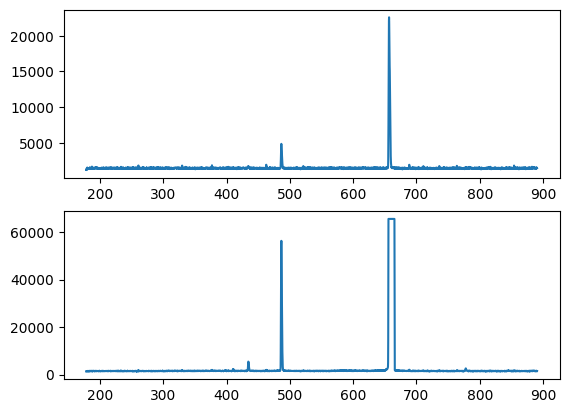

In [23]:
# Antes de começarmos os plots vamos ter de organizar os arquivos do hidrogênio primeiro

h1 = pd.read_csv('./new/Hidrogênio1.txt', sep = '\t')
h2 = pd.read_csv('./new/Hidrogênio2.txt', sep = '\t')

fig, axs = plt.subplots(2,1)

axs[0].plot(h1['Comprimento'], h1['Intensity'])
axs[1].plot(h2['Comprimento'], h2['Intensity'])

No caso do hidrogênio foram obtidos dois espectros. O motivo foi o terceiro pico observado no segundo gráfico, que como pode ser claramente observado, tem o que chamamos de saturação, onde a intesidade da luz, que estava sendo medida, ultrapassa o limite do equipamento. Sendo assim, para evitar essa saturação nas medidas, foram obtidos dois espectros, sendo que vamos utilizar a metade para esquerda com o espectro salvo no arquivo `Hidrogênio1.txt` e a metade para esquerda o arquivo `Hidrogêncio2.txt` será utilizado, para conseguirmos analizar o primeiro pico, que pode ser observado mais claramente no segundo gráfico(Essa seleção será feita manualmente e salva em um novo arquivo `Hidrogênio.txt`).

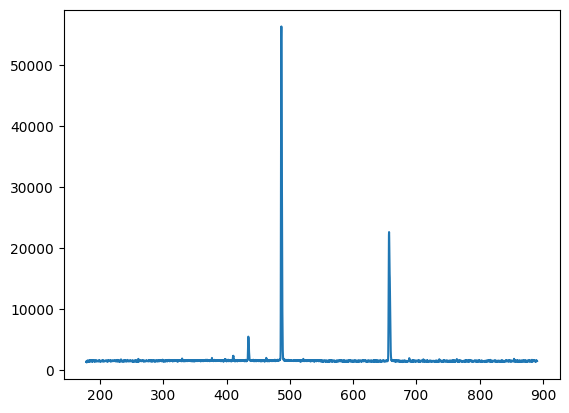

In [24]:
h = pd.read_csv('./new/Hidrogênio.txt', sep = '\t')

plt.plot(h['Comprimento'], h['Intensity'])

Este ajuste pode parecer errado, pois as intensidades agora deixaram de ser equivalentes umas as otras. Mas este é um detalhe que não importará para as análises feitas aqui, então não temos este problema, apenas estamos interessados em saber o Comprimento de onda(eixo das abscissas) dos picos de emissão.

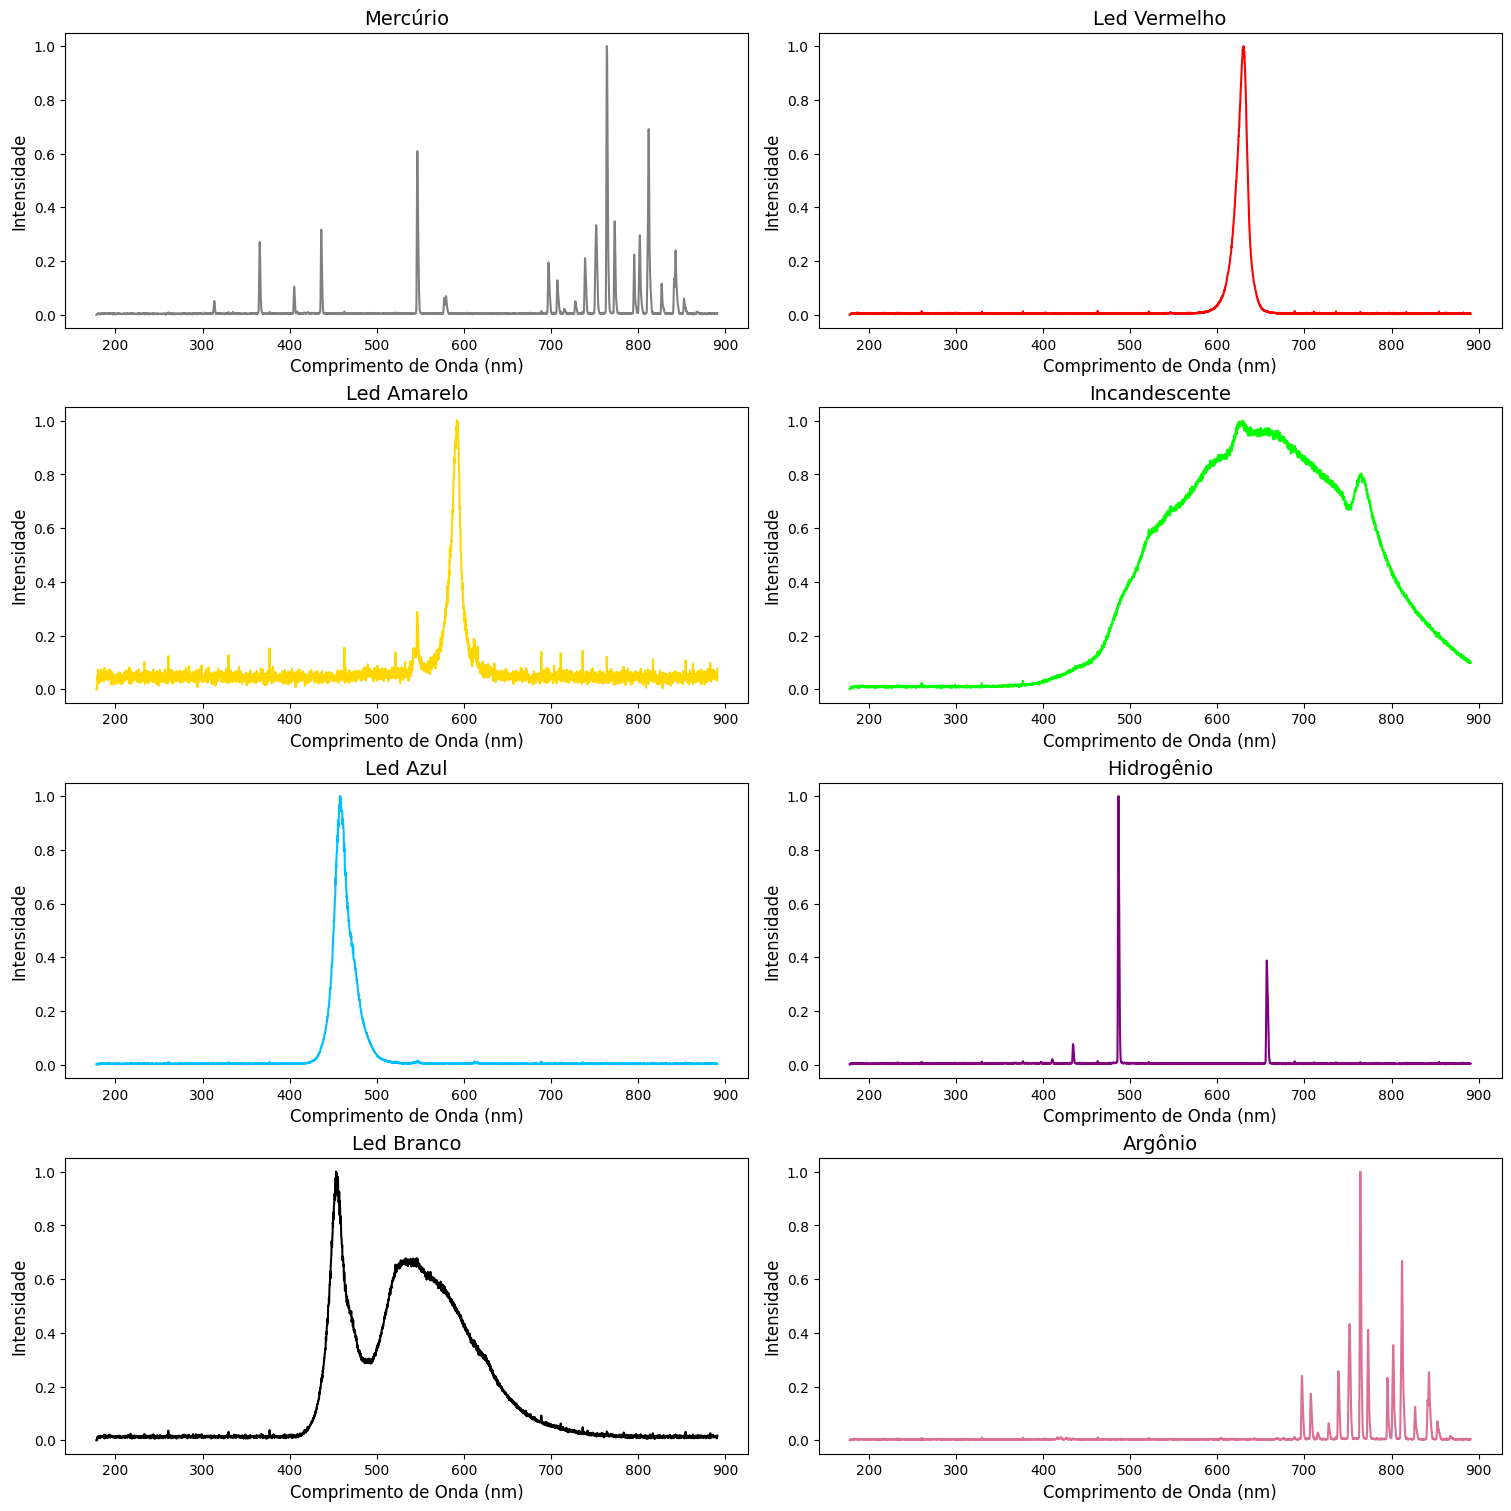

In [34]:
# Agora vamos começar a organizar a forma final do plot

files = os.listdir('./new/')

fig, axs =  plt.subplots(4,2, layout='constrained') # Os gráficos serão mostrados em duas colunas

fig.set_figheight(15)
fig.set_figwidth(15)

# Apenas uma forma rápida de plotar cada curva com uma cor específica
colors = {'Argônio': 'palevioletred',
          'Led Amarelo': 'gold',
          'Led Azul': 'deepskyblue',
          'Led Branco': 'black',
          'Led Vermelho': 'red',
          'Incandescente': 'lime',
          'Mercúrio': 'gray',
          'Hidrogênio': 'purple'}

counter = 0
for file in files:
    if file.endswith('.txt'):
        file_name = file[:-4] # O nome do arquivo será usado como título
        temp_data = pd.read_csv('./new/'+file, sep = '\t')
        example_plot(axs.flat[counter-1], temp_data, file_name, colors.get(file_name))
        counter += 1
        
plt.show()
#ptl.savefig('teste.png') # Usado para exportar a figura
plt.close()

## Conclusão

Observamos então que cada fonte de luz, como era de se esperar, terá um espectro. E as analises subsequentes se ocuparão de entender como cada fonte de luz utiliza de diferentes métodos, para emissão de luz, e quais fenômenos estão relacionados com a obtenção de cada espectro.